In [37]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from sklearn.metrics.pairwise import cosine_similarity
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

E:\Study Software\ANA\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [224]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
import numpy as np
from keras import callbacks
from keras.callbacks import EarlyStopping
from wordcloud import WordCloud
from nltk import FreqDist
import wordcloud

In [181]:
df1 = pd.read_excel('Management Growth Buzz - Data.xlsx', sheet_name = 'Relevant')

In [8]:
df2 = pd.read_excel('Management Growth Buzz - Data.xlsx', sheet_name = 'Non-Relevant')

In [17]:
# all_df = df1[['Sentences']]
all_df['Relevancy'] = 1
all_df

E:\Study Software\ANA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sentences,Relevancy
0,Baidu formed a strategic partnership with Qual...,1
1,Blackbaud announced the results of a commissio...,1
2,Earnings per fully diluted ADS on a GAAP basis...,1
3,"Fortescue's current director of operations, Gr...",1
4,GAAP net loss for the third fiscal quarter was...,1
5,"Issued 1,250,common shares on the exercise of ...",1
6,Launched SEO Wiz to power search optimization ...,1
7,Macquarie says it is still likely that Austral...,1
8,"More bad news is expected from Myer, with Citi...",1
9,Secured a New $1M Credit Facility with Comeric...,1


In [18]:
all_df1 = df2[['Sentences']]
all_df1['Relevancy'] = 0
all_df1

E:\Study Software\ANA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sentences,Relevancy
0,"AcquiFlow, a value-added reseller, selects Hel...",0
1,Atos delivers a fully-managed cloud container ...,0
2,Baidu formed a strategic partnership with NVID...,0
3,Completed a private placement transaction of c...,0
4,Customers' voicemail boxes are protected withi...,0
5,Drive Branded Foodservice within our Industria...,0
6,Exercise differently -- Lifting heavy weights ...,0
7,"GAAP net loss was $million, or (8)% of Revenue...",0
8,Partnered with charities around the world thro...,0
9,(AVGO)hostile takeover bid for Qualcomm,0


In [21]:
all_s_df = pd.concat([all_df,all_df1], ignore_index=True)
all_s_df

,Sentences,Relevancy
0,Baidu formed a strategic partnership with Qual...,1
1,Blackbaud announced the results of a commissio...,1
2,Earnings per fully diluted ADS on a GAAP basis...,1
3,"Fortescue's current director of operations, Gr...",1
4,GAAP net loss for the third fiscal quarter was...,1
5,"Issued 1,250,common shares on the exercise of ...",1
6,Launched SEO Wiz to power search optimization ...,1
7,Macquarie says it is still likely that Austral...,1
8,"More bad news is expected from Myer, with Citi...",1
9,Secured a New $1M Credit Facility with Comeric...,1


In [25]:
all_s_df1 = sklearn.utils.shuffle(all_s_df)


,Sentences,Relevancy
2052,The Wall Street Journal reported this month th...,0
1447,Germany is an incredibly difficult market wher...,0
287,GKN reiterated both its support for the Dana o...,1
1855,"Sunil Kanoria, president of trade body The Ass...",0
1184,"As a result of KPMG's audit quality, the FRC s...",0
431,Knight says UNP already works closely with oth...,1
1012,With a foundation in a great gaming experience...,1
1025,With the work we have done over the past four ...,1
1067,29% Closing London Shares Seen Opening Lower a...,0
1542,In connection with his position as an executiv...,0


In [27]:
all_s_df2 = all_s_df1.reset_index(drop=True)


,Sentences,Relevancy
0,The Wall Street Journal reported this month th...,0
1,Germany is an incredibly difficult market wher...,0
2,GKN reiterated both its support for the Dana o...,1
3,"Sunil Kanoria, president of trade body The Ass...",0
4,"As a result of KPMG's audit quality, the FRC s...",0
5,Knight says UNP already works closely with oth...,1
6,With a foundation in a great gaming experience...,1
7,With the work we have done over the past four ...,1
8,29% Closing London Shares Seen Opening Lower a...,0
9,In connection with his position as an executiv...,0


In [30]:
split = train_test_split(all_s_df2, shuffle = False)


[                                              Sentences  Relevancy
 0     The Wall Street Journal reported this month th...          0
 1     Germany is an incredibly difficult market wher...          0
 2     GKN reiterated both its support for the Dana o...          1
 3     Sunil Kanoria, president of trade body The Ass...          0
 4     As a result of KPMG's audit quality, the FRC s...          0
 5     Knight says UNP already works closely with oth...          1
 6     With a foundation in a great gaming experience...          1
 7     With the work we have done over the past four ...          1
 8     29% Closing London Shares Seen Opening Lower a...          0
 9     In connection with his position as an executiv...          0
 10    Expansion and optimisation in our established ...          1
 11    The results show that this technology can be a...          0
 12    Barbara Smith, Chairman of the Board, CEO, and...          1
 13    Formerly, Harris was the Senior Managing 

In [39]:
train = pd.DataFrame(split[0])
test = pd.DataFrame(split[1])

In [61]:
# train
lower_list = []
for x in train['Sentences']:
    lower_list.append([word for word in word_tokenize(x.lower()) if word not in stopwords.words('english')])

In [152]:
#test
test_without_class = test[['Sentences']].reset_index(drop=True)
test_without_class

,Sentences
0,Trump threatened to impose tariffs on $billion...
1,But he suggests another interpretation given t...
2,Chinese investors have flocked to steel-relate...
3,We started the year very well positioned to ac...
4,Wholesale product margins experienced ongoing ...
5,"As planned, cyan has used part of the proceeds..."
6,"During the quarter, the Divisions offering was..."
7,"Cheetah Mobile's products, including its popul..."
8,Restated for the accounting impact of the expe...
9,Raymond James's Simon Leopold reiterates an Ou...


In [155]:
# test
test_lower = []
for x in test['Sentences']:
    test_lower.append([word for word in word_tokenize(x.lower()) if word not in stopwords.words('english')])

In [156]:
test_lower

[['trump',
  'threatened',
  'impose',
  'tariffs',
  '$',
  'billion',
  'chinese',
  'imports',
  ',',
  'friday',
  ',',
  'administration',
  'put',
  'effect',
  '25',
  '%',
  'tariff',
  'steel',
  '10',
  '%',
  'tariff',
  'aluminum'],
 ['suggests',
  'another',
  'interpretation',
  'given',
  'company',
  "'s",
  'history',
  'upcoming',
  'shift',
  ',',
  'indicated',
  'memo',
  ',',
  'could',
  'analogous',
  'massive',
  'shift',
  'late',
  '90',
  "'s",
  'required',
  'downsizing',
  ',',
  'new',
  'investments',
  ',',
  'lot',
  'change'],
 ['chinese',
  'investors',
  'flocked',
  'steel-related',
  'futures',
  'since',
  'start',
  'year',
  'expectation',
  'drop',
  'supplies',
  'rollout',
  'government',
  'measures',
  'aimed',
  'reducing',
  'excess',
  'capacity',
  'curbing',
  'industry-related',
  'pollution'],
 ['started',
  'year',
  'well',
  'positioned',
  'achieve',
  'double-double',
  'goals',
  ',',
  'ended',
  'exceptionally',
  'good',
 

In [95]:
lower_list

[['wall',
  'street',
  'journal',
  'reported',
  'month',
  'sinclair',
  'facing',
  'pushback',
  'fcc',
  ',',
  'questions',
  'sinclair',
  "'s",
  'plans',
  'sell',
  'tribune-owned',
  'television',
  'stations',
  'new',
  'york',
  'chicago',
  'organizations',
  'long',
  'ties',
  'sinclair'],
 ['germany',
  'incredibly',
  'difficult',
  'market',
  'companies',
  'years',
  'wrote',
  'policies',
  'promising',
  'long-term',
  'income',
  'levels',
  'today',
  'often',
  'look',
  'painful',
  'sometimes',
  'suicidal'],
 ['gkn',
  'reiterated',
  'support',
  'dana',
  'offer',
  'rejection',
  'melrose',
  "'s",
  'takeover',
  'bid',
  ',',
  'said',
  'company',
  'intends',
  'return',
  'million',
  'pounds',
  '(',
  '$',
  'million',
  ')',
  'cash',
  'transaction',
  'takes',
  'place',
  ',',
  'represent',
  'first',
  'installment',
  'previously',
  'announced',
  'cash-return',
  'program'],
 ['sunil',
  'kanoria',
  ',',
  'president',
  'trade',
  'bo

In [92]:
# train
full_clean = []
for x in lower_list:
        full_clean.append([ps.stem(word) for word in x])

In [93]:
len(full_clean)

1675

In [94]:
full_clean

[['wall',
  'street',
  'journal',
  'report',
  'month',
  'sinclair',
  'face',
  'pushback',
  'fcc',
  ',',
  'question',
  'sinclair',
  "'s",
  'plan',
  'sell',
  'tribune-own',
  'televis',
  'station',
  'new',
  'york',
  'chicago',
  'organ',
  'long',
  'tie',
  'sinclair'],
 ['germani',
  'incred',
  'difficult',
  'market',
  'compani',
  'year',
  'wrote',
  'polici',
  'promis',
  'long-term',
  'incom',
  'level',
  'today',
  'often',
  'look',
  'pain',
  'sometim',
  'suicid'],
 ['gkn',
  'reiter',
  'support',
  'dana',
  'offer',
  'reject',
  'melros',
  "'s",
  'takeov',
  'bid',
  ',',
  'said',
  'compani',
  'intend',
  'return',
  'million',
  'pound',
  '(',
  '$',
  'million',
  ')',
  'cash',
  'transact',
  'take',
  'place',
  ',',
  'repres',
  'first',
  'instal',
  'previous',
  'announc',
  'cash-return',
  'program'],
 ['sunil',
  'kanoria',
  ',',
  'presid',
  'trade',
  'bodi',
  'associ',
  'chamber',
  'commerc',
  'india',
  ',',
  'said',
  

In [157]:
# test
test_full_clean = []
for x in test_lower:
        test_full_clean.append([ps.stem(word) for word in x])

In [158]:
len(test_full_clean)

559

In [159]:
test_full_clean

[['trump',
  'threaten',
  'impos',
  'tariff',
  '$',
  'billion',
  'chines',
  'import',
  ',',
  'friday',
  ',',
  'administr',
  'put',
  'effect',
  '25',
  '%',
  'tariff',
  'steel',
  '10',
  '%',
  'tariff',
  'aluminum'],
 ['suggest',
  'anoth',
  'interpret',
  'given',
  'compani',
  "'s",
  'histori',
  'upcom',
  'shift',
  ',',
  'indic',
  'memo',
  ',',
  'could',
  'analog',
  'massiv',
  'shift',
  'late',
  '90',
  "'s",
  'requir',
  'downsiz',
  ',',
  'new',
  'invest',
  ',',
  'lot',
  'chang'],
 ['chines',
  'investor',
  'flock',
  'steel-rel',
  'futur',
  'sinc',
  'start',
  'year',
  'expect',
  'drop',
  'suppli',
  'rollout',
  'govern',
  'measur',
  'aim',
  'reduc',
  'excess',
  'capac',
  'curb',
  'industry-rel',
  'pollut'],
 ['start',
  'year',
  'well',
  'posit',
  'achiev',
  'double-doubl',
  'goal',
  ',',
  'end',
  'except',
  'good',
  ',',
  'result',
  'compani',
  'exceed',
  'goal',
  ',',
  'said',
  'jason'],
 ['wholesal',
  'pro

In [97]:
def listtostring(lists):
    comb = [' '.join(row) for row in lists]
    return comb

In [98]:
#train
full_clean1 = listtostring(full_clean)
full_clean1

["wall street journal report month sinclair face pushback fcc , question sinclair 's plan sell tribune-own televis station new york chicago organ long tie sinclair",
 'germani incred difficult market compani year wrote polici promis long-term incom level today often look pain sometim suicid',
 "gkn reiter support dana offer reject melros 's takeov bid , said compani intend return million pound ( $ million ) cash transact take place , repres first instal previous announc cash-return program",
 'sunil kanoria , presid trade bodi associ chamber commerc india , said strong case fiscal monetari support help strengthen consum demand invest',
 "result kpmg 's audit qualiti , frc said inspect 25 % firm 's audit 2018-cycl work close monitor implement audit-qu plan",
 "knight say unp alreadi work close larg railroad oper reduc cost improv servic custom , harrison 's potenti presenc csx would n't chang strategi",
 'foundat great game experi , long-term custom relationship establish strong brand ,

In [99]:
# train
clean_df = pd.DataFrame()
clean_df['Sentences'] = full_clean1
clean_df

,Sentences
0,wall street journal report month sinclair face...
1,germani incred difficult market compani year w...
2,gkn reiter support dana offer reject melros 's...
3,"sunil kanoria , presid trade bodi associ chamb..."
4,"result kpmg 's audit qualiti , frc said inspec..."
5,knight say unp alreadi work close larg railroa...
6,"foundat great game experi , long-term custom r..."
7,"work done past four year accomplish 2018 , bel..."
8,29 % close london share seen open lower weak o...
9,"connect posit execut control , receiv annual b..."


In [160]:
#test
test_full_clean1 = listtostring(test_full_clean)
test_full_clean1

['trump threaten impos tariff $ billion chines import , friday , administr put effect 25 % tariff steel 10 % tariff aluminum',
 "suggest anoth interpret given compani 's histori upcom shift , indic memo , could analog massiv shift late 90 's requir downsiz , new invest , lot chang",
 'chines investor flock steel-rel futur sinc start year expect drop suppli rollout govern measur aim reduc excess capac curb industry-rel pollut',
 'start year well posit achiev double-doubl goal , end except good , result compani exceed goal , said jason',
 'wholesal product margin experienc ongo headwind delay approv portland product facil licens , requir compani purchas oil third parti higher cost',
 'plan , cyan use part proce fund full acquisit cyan secur group gmbh , act hold oper unit cyan group',
 'quarter , divis offer strengthen acquisit qualiti engin group sweden , work qualiti assur energi , life scienc process industri',
 "cheetah mobil 's product , includ popular mission-crit util applic clean

In [161]:
#test
test_clean_df = pd.DataFrame()
test_clean_df['Sentences'] = test_full_clean1
test_clean_df

,Sentences
0,trump threaten impos tariff $ billion chines i...
1,suggest anoth interpret given compani 's histo...
2,chines investor flock steel-rel futur sinc sta...
3,start year well posit achiev double-doubl goal...
4,wholesal product margin experienc ongo headwin...
5,"plan , cyan use part proce fund full acquisit ..."
6,"quarter , divis offer strengthen acquisit qual..."
7,"cheetah mobil 's product , includ popular miss..."
8,restat account impact expens associ two share ...
9,raymond jame 's simon leopold reiter outperfor...


In [114]:
# tfidfer model fit
def tfidfer(text_from_df):
    corpus = [rows for rows in text_from_df]
    vectorizer.fit(corpus)

In [115]:
#transform
def transform(text):
    corpus = [rows for rows in text]
    vectors = vectorizer.transform(corpus)
    print(vectors.toarray().shape)
    vectors = vectors.toarray()
    return vectors

In [120]:
#train
merge_train = list(clean_df.Sentences)
merge_train

In [162]:
#test
merge_test = list(test_clean_df.Sentences)
merge_test

['trump threaten impos tariff $ billion chines import , friday , administr put effect 25 % tariff steel 10 % tariff aluminum',
 "suggest anoth interpret given compani 's histori upcom shift , indic memo , could analog massiv shift late 90 's requir downsiz , new invest , lot chang",
 'chines investor flock steel-rel futur sinc start year expect drop suppli rollout govern measur aim reduc excess capac curb industry-rel pollut',
 'start year well posit achiev double-doubl goal , end except good , result compani exceed goal , said jason',
 'wholesal product margin experienc ongo headwind delay approv portland product facil licens , requir compani purchas oil third parti higher cost',
 'plan , cyan use part proce fund full acquisit cyan secur group gmbh , act hold oper unit cyan group',
 'quarter , divis offer strengthen acquisit qualiti engin group sweden , work qualiti assur energi , life scienc process industri',
 "cheetah mobil 's product , includ popular mission-crit util applic clean

In [124]:
#train
vectorizer = TfidfVectorizer(max_features=50000000)
tfidfer(merge_train)

In [126]:
#transform train

Sentences_tfidf_vector = transform(clean_df.Sentences)

(1675, 6624)


In [164]:
# transform test
test_Sentences_tfidf_vector = transform(test_clean_df.Sentences)

(559, 6624)


In [130]:
# train
train_array = np.asarray(Sentences_tfidf_vector)
train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
# test
test_array = np.asarray(test_Sentences_tfidf_vector)
test_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
target = np.asarray(train['Relevancy'])
target

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [132]:
y_train = keras.utils.to_categorical(target, 2)
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [147]:
target.shape

(1675,)

In [275]:
early_stopping = EarlyStopping(patience = 4)

In [276]:
model = Sequential()
model.add(Dense(100, activation= 'relu', input_shape = (6624,)))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [281]:
model.fit(train_array,y_train, epochs = 50,validation_split = 0.2 ,callbacks = [early_stopping])

Train on 1340 samples, validate on 335 samples
Epoch 1/50
1340/1340 [==============================] - 0s 175us/step - loss: 1.1540e-06 - acc: 1.0000 - val_loss: 2.6483e-06 - val_acc: 1.0000
Epoch 2/50
1340/1340 [==============================] - 0s 175us/step - loss: 1.0315e-06 - acc: 1.0000 - val_loss: 3.8797e-06 - val_acc: 1.0000
Epoch 3/50
1340/1340 [==============================] - 0s 168us/step - loss: 9.3994e-07 - acc: 1.0000 - val_loss: 4.0983e-06 - val_acc: 1.0000
Epoch 4/50
1340/1340 [==============================] - 0s 167us/step - loss: 8.9714e-07 - acc: 1.0000 - val_loss: 5.1331e-06 - val_acc: 1.0000
Epoch 5/50
1340/1340 [==============================] - 0s 167us/step - loss: 8.5915e-07 - acc: 1.0000 - val_loss: 6.1951e-06 - val_acc: 1.0000


In [279]:
#training performance
scores = model.evaluate(train_array,y_train, verbose=1)
scores

1675/1675 [==============================] - 0s 90us/step


[6.935798153437591e-06, 1.0]

In [150]:
from keras.models import load_model
model.save('first_growth_tfidf')

In [166]:
#extracting test stances into array
test_target = [[rows] for rows in test.Relevancy]
test_target = np.asarray(test_target)
test_target

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [167]:
# test
num_classes = 2
y_test = keras.utils.to_categorical(test_target, num_classes)
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [169]:
#test performance
scores = model.evaluate(test_array,y_test, verbose=1)
scores

559/559 [==============================] - 0s 112us/step


[0.7947442013377154, 0.7155635066876898]

In [170]:
#test predictions
preds = model.predict(test_array, verbose = 1)

559/559 [==============================] - 0s 137us/step


In [171]:
preds

array([[0.9816435 , 0.01835655],
       [0.9910863 , 0.00891367],
       [0.88175565, 0.11824439],
       ...,
       [0.9934308 , 0.00656917],
       [0.03359646, 0.96640354],
       [0.95945543, 0.04054458]], dtype=float32)

In [172]:
# converting predictions to relevancy
f_preds =[]
for row in preds:
    f_preds.append(np.where(row == row.max())[0].tolist()[0])
f_preds

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


In [174]:
test_target = test_target.tolist()

In [175]:
test_target

[[1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0]

In [176]:
# converting actual predictions to list
test_actual=[row[0] for row in test_target]
test_actual  

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print("Confusion Matrix: \n", confusion_matrix(test_actual, f_preds))
print(classification_report(test_actual, f_preds), "Accuracy: ", accuracy_score(test_actual, f_preds))

Confusion Matrix: 
 [[230  81]
 [ 78 170]]
             precision    recall  f1-score   support

          0       0.75      0.74      0.74       311
          1       0.68      0.69      0.68       248

avg / total       0.72      0.72      0.72       559
 Accuracy:  0.7155635062611807


In [250]:
X14 = ""
for words_list in fdist_list:
        for word in words_list:
            X14 += word + " "
    

In [259]:
X15 = ""
for words_list in fdist_list:
        for word in words_list:
            X15 += word + " "
    

In [258]:
fdist_list1 = []
for x in df2['Sentences']:
    fdist_list.append([word for word in word_tokenize(x.lower()) if word not in stopwords.words('english')])

In [252]:
tokens=[]
tokens = (word_tokenize(X14))

fdist = FreqDist(tokens)

In [265]:
tokens1=[]
tokens1 = (word_tokenize(X15))

fdist1 = FreqDist(tokens1)

In [270]:
fdist1

FreqDist({'baidu': 4,
          'formed': 6,
          'strategic': 41,
          'partnership': 12,
          'qualcomm': 21,
          'optimize': 7,
          "'s": 877,
          'voice': 5,
          'assistant': 6,
          'dueros': 2,
          'smartphones': 2,
          '(': 356,
          'r': 21,
          ')': 356,
          'snapdragon': 2,
          'tm': 12,
          'mobile': 26,
          'platform': 33,
          ',': 4350,
          'including': 107,
          'upcoming': 8,
          'blackbaud': 4,
          'announced': 43,
          'results': 78,
          'commissioned': 1,
          'total': 45,
          'economic': 34,
          'impact': 39,
          'tei': 1,
          'study': 18,
          'conducted': 5,
          'forrester': 1,
          'consulting': 7,
          'behalf': 7,
          'examining': 2,
          'return': 20,
          'investment': 73,
          'university': 11,
          'north': 40,
          'texas': 4,
          'experienced

In [271]:
wordcloud = WordCloud().generate_from_frequencies(fdist1)
# WordCloud.generate_from_frequencies(frequencies = fdist, max_font_size=int)

In [272]:
import matplotlib.pyplot as plt

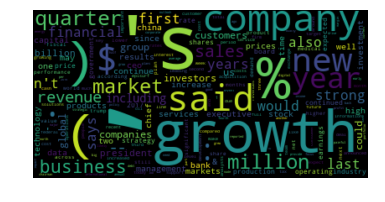

In [274]:
# plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Not Relevant.png')
plt.savefig('Not Relevant.pdf')
plt.show()

In [236]:
fdist_list = []
for x in df1['Sentences']:
    fdist_list.append([word for word in word_tokenize(x.lower()) if word not in stopwords.words('english')])

In [238]:
fdist_list

[['baidu',
  'formed',
  'strategic',
  'partnership',
  'qualcomm',
  'optimize',
  'baidu',
  "'s",
  'voice',
  'assistant',
  'dueros',
  'smartphones',
  'qualcomm',
  '(',
  'r',
  ')',
  'snapdragon',
  '(',
  'tm',
  ')',
  'mobile',
  'platform',
  ',',
  'including',
  'upcoming',
  'snapdragon',
  'mobile',
  'platform'],
 ['blackbaud',
  'announced',
  'results',
  'commissioned',
  'total',
  'economic',
  'impact',
  '(',
  'tm',
  ')',
  '(',
  'tei',
  ')',
  'study',
  'conducted',
  'forrester',
  'consulting',
  'behalf',
  'blackbaud',
  ',',
  'examining',
  'return',
  'investment',
  'university',
  'north',
  'texas',
  'experienced',
  'deploying',
  'blackbaud',
  'raiser',
  "'s",
  'edge',
  'nxt',
  '(',
  'tm',
  ')'],
 ['earnings',
  'per',
  'fully',
  'diluted',
  'ads',
  'gaap',
  'basis',
  '$',
  'first',
  'quarter',
  '2017',
  ',',
  'compared',
  'loss',
  'per',
  'fully',
  'diluted',
  'ads',
  '$',
  'fourth',
  'quarter',
  'earnings',
  'p